In [7]:
# Allows us to import files from the base folder
import sys
import os
# Get the parent directory of the notebook's folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(base_dir)

# Imports
from quantum_error_correction import *

from icecream import ic # For debugging

import jax

key = jax.random.key( 42 ) # get an initial random "key" from a seed, here 42

# Create the surface code in its standard configuration

(<Figure size 1920x1440 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

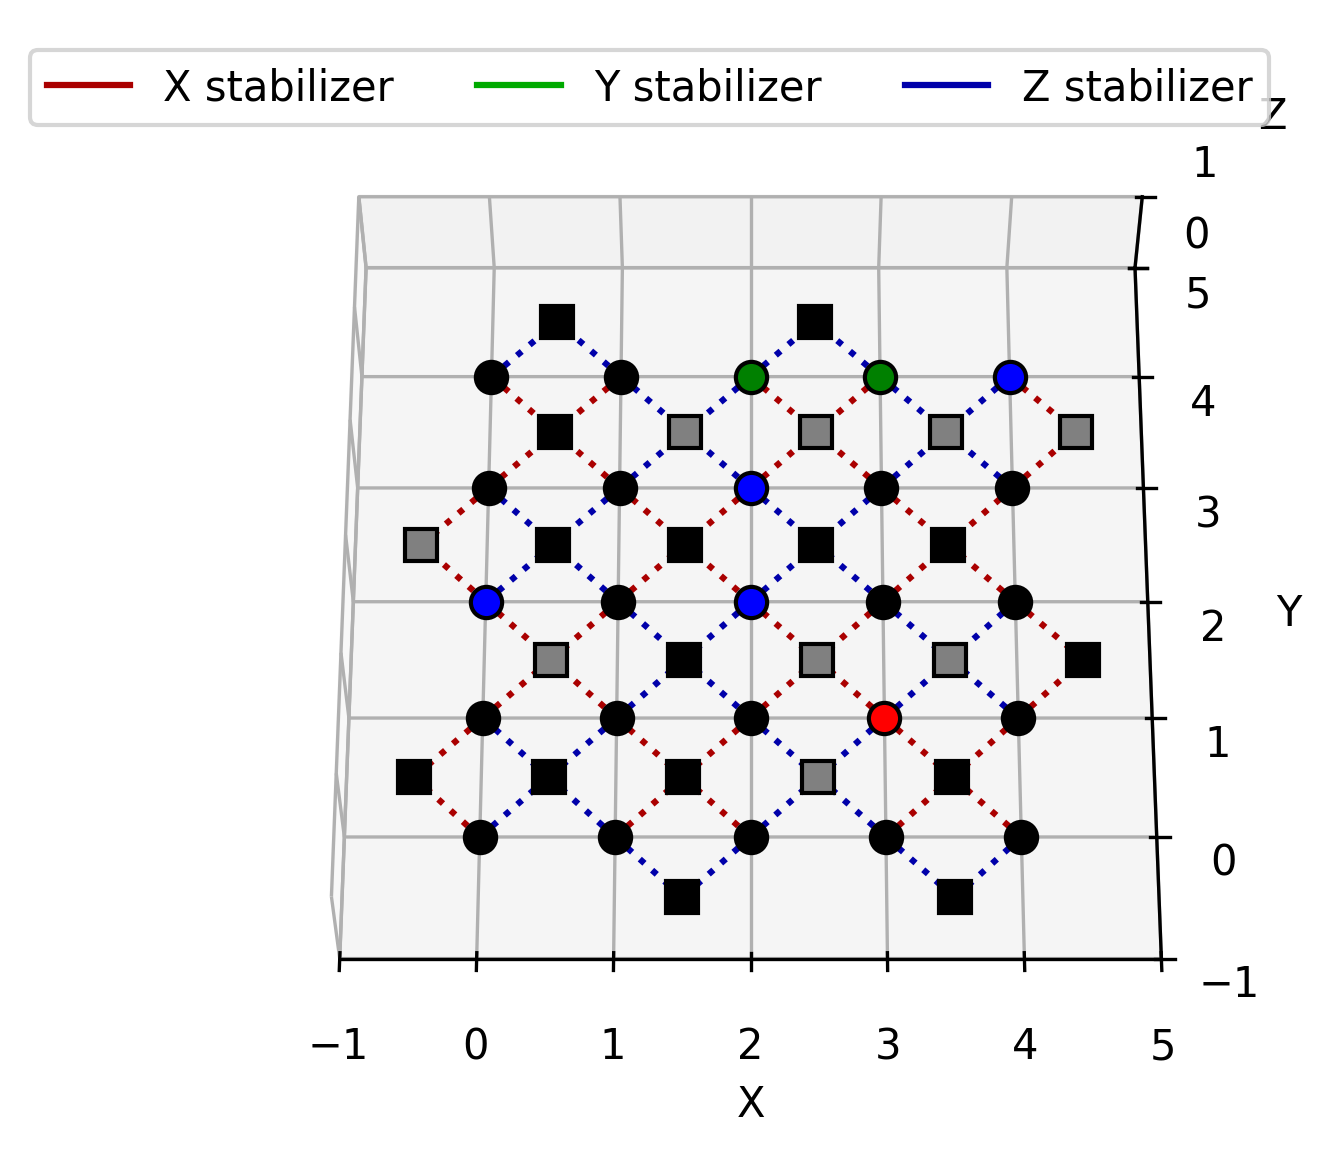

In [8]:
code_distance = 5

subkey, key = jax.random.split(key)
errors = jax_create_error_batch(
    px = .1,
    py = .1,
    pz = .1,
    size = code_distance**2,
    batch_size = 1,
    key = subkey
)

qec = QEC(surface_code_data(d=5))
qec.show(errors=errors[0])

# Creates a deformed version of the surface code

### The XY-version

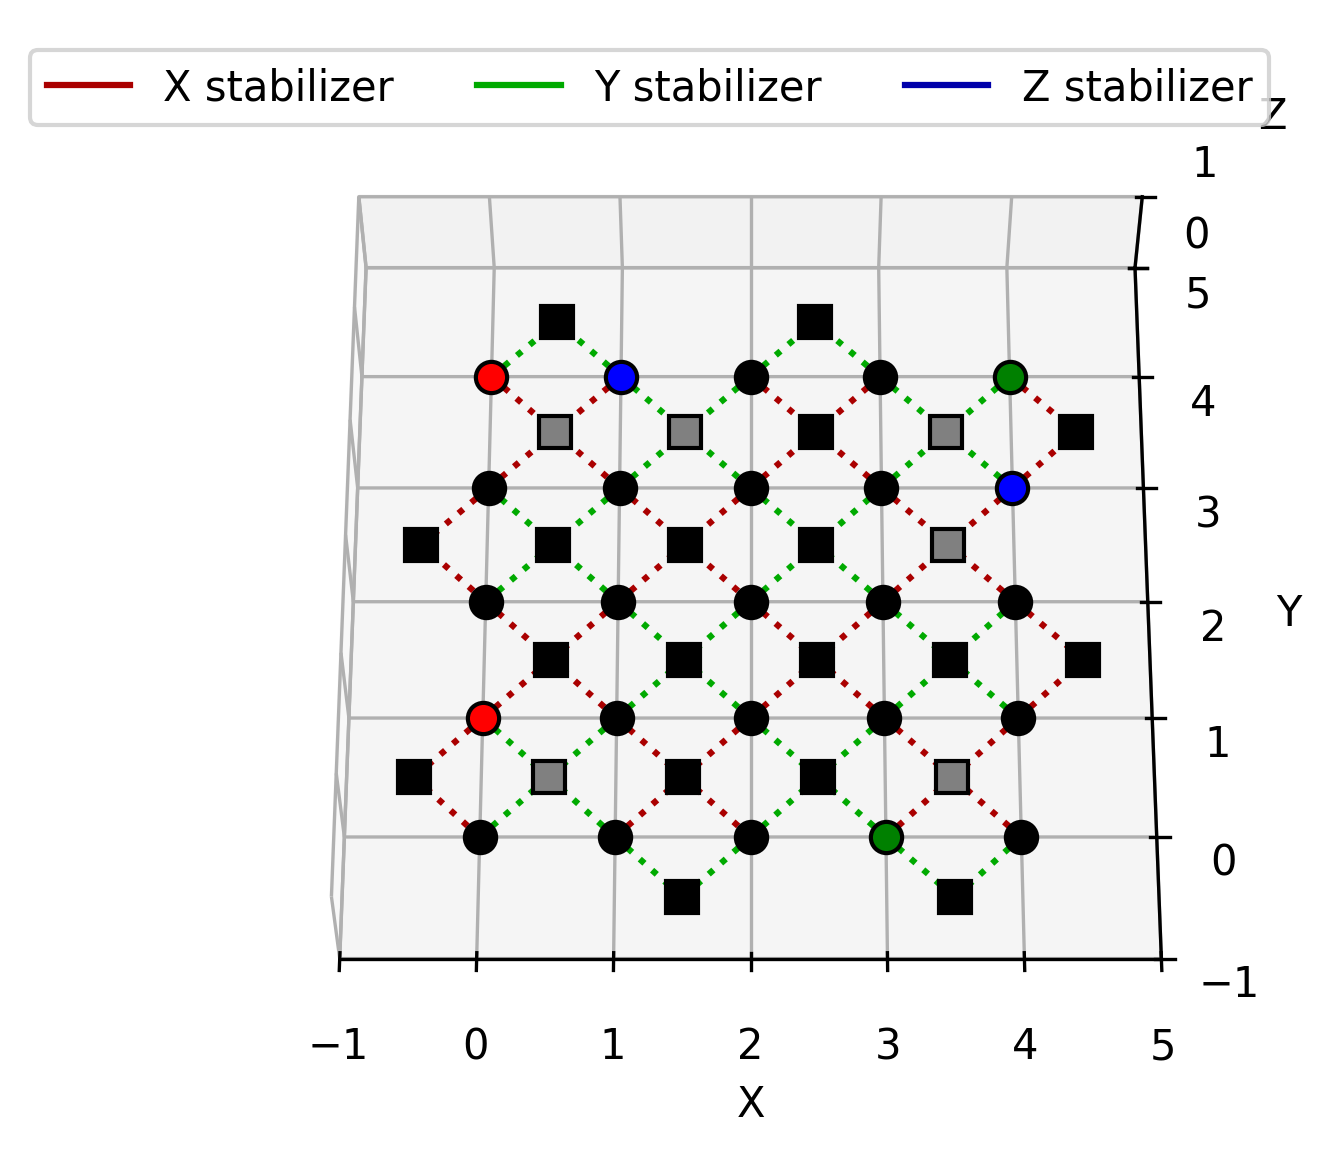

In [9]:
code_distance = 5

subkey, key = jax.random.split(key)
errors = jax_create_error_batch(
    px = .1,
    py = .1,
    pz = .1,
    size = code_distance**2,
    batch_size = 10,
    key = subkey
)

qec = QEC(surface_code_data(d=5))
# Loops through the (i,j) coordinates of the data qubits
for i in range(code_distance):
    for j in range(code_distance):
        qec.deform([i,j], deformations['YZ'])
qec.show(errors=errors[0]);

In [10]:
# Get the syndromes from the errors
Mx, My, Mz = qec.transformation_matrix()
syndromes = jax_get_syndromes_batch(Mx, My, Mz, errors)

for i in range(errors.shape[0]):
    print(f"{f'( idx = {i} )':=^51s}")
    print(errors[i])
    print(syndromes[i])

====================( idx = 0 )====================
[0 1 0 0 1 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 0 0 3 2]
[0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0]
====================( idx = 1 )====================
[3 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 3]
[1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1]
====================( idx = 2 )====================
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 1 3 2 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
====================( idx = 3 )====================
[0 0 0 0 0 0 0 3 0 0 1 0 3 0 0 0 0 0 3 0 0 1 0 0 0]
[0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0]
====================( idx = 4 )====================
[2 0 0 0 0 0 0 2 3 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0]
====================( idx = 5 )====================
[0 3 1 0 0 2 2 0 0 3 0 1 0 2 2 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
====================( idx = 6 )====================
[0 0 1 0 0 0 0 2 0 0 0 3

### The XZZX-version
Used by google in [Quantum error correction below the surface code threshold](https://arxiv.org/abs/2408.13687)

(<Figure size 1920x1440 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

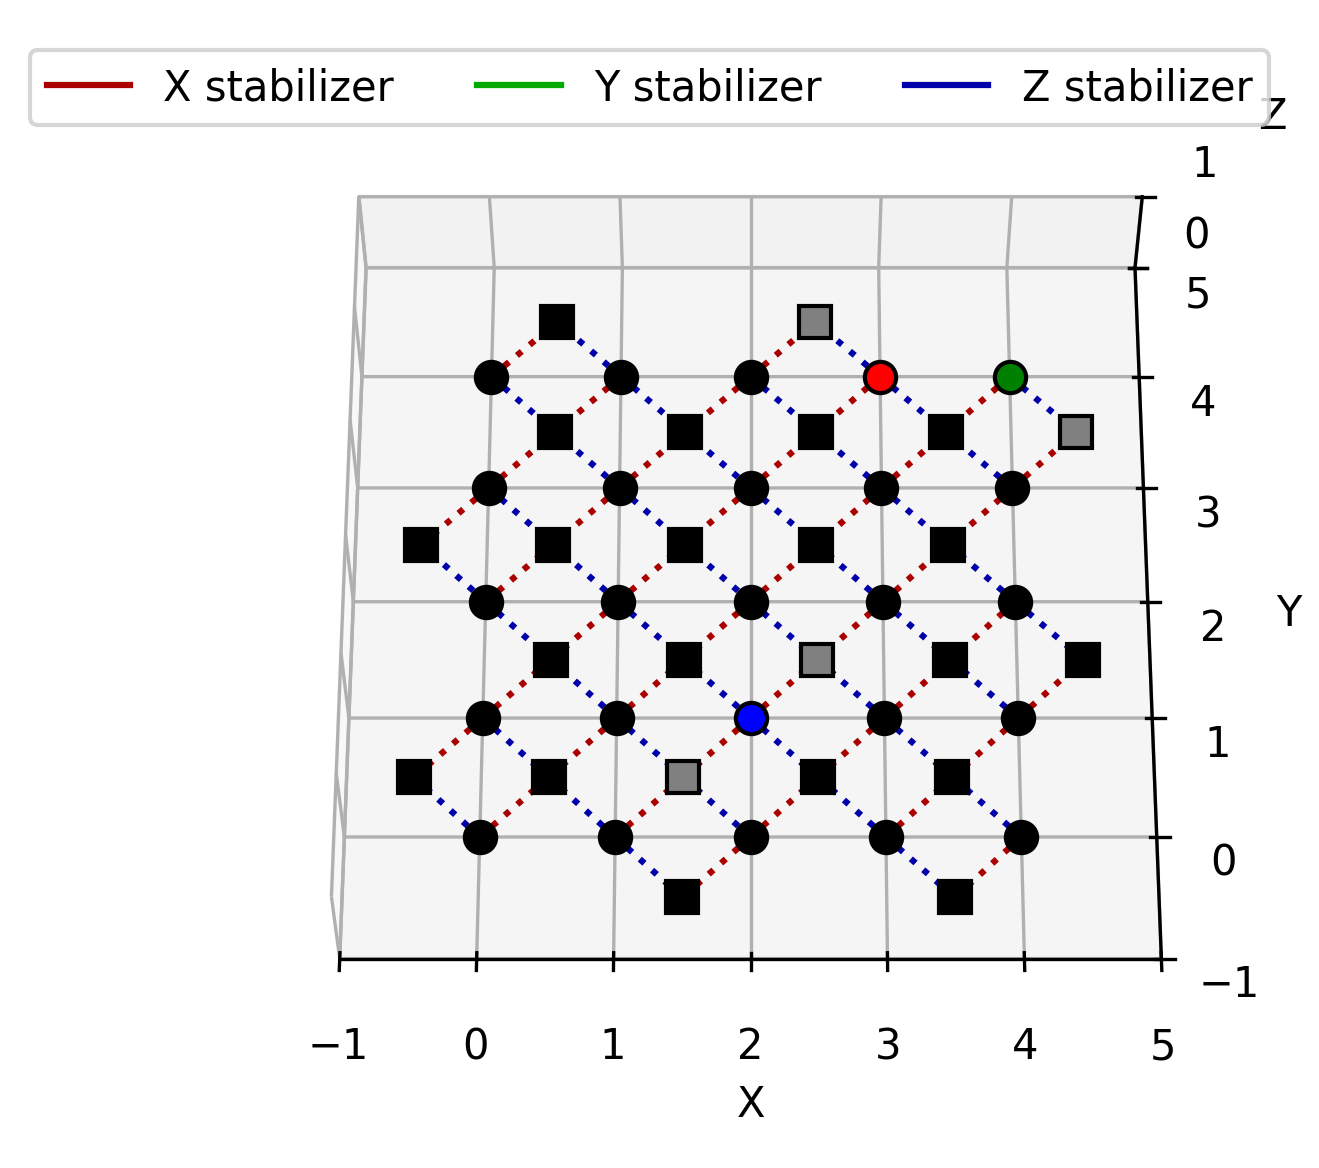

In [11]:
code_distance = 5

subkey, key = jax.random.split(key)
errors = jax_create_error_batch(
    px = .1,
    py = .1,
    pz = .1,
    size = code_distance**2,
    batch_size = 1,
    key = subkey
)

qec = QEC(surface_code_data(d=5))
# Loops through the (i,j) coordinates of the data qubits
for i in range(code_distance):
    for j in range(code_distance):
        if (i+j)%2 == 0:
            qec.deform([i,j], deformations['XZ'])
        else:
            qec.deform([i,j], deformations['I'])
qec.show(errors=errors[0])

### The expanded C1-code
Based on the C1 code from [Tailored XZZX codes for biased noise](https://doi.org/10.1103/PhysRevResearch.5.013035)

(<Figure size 1920x1440 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

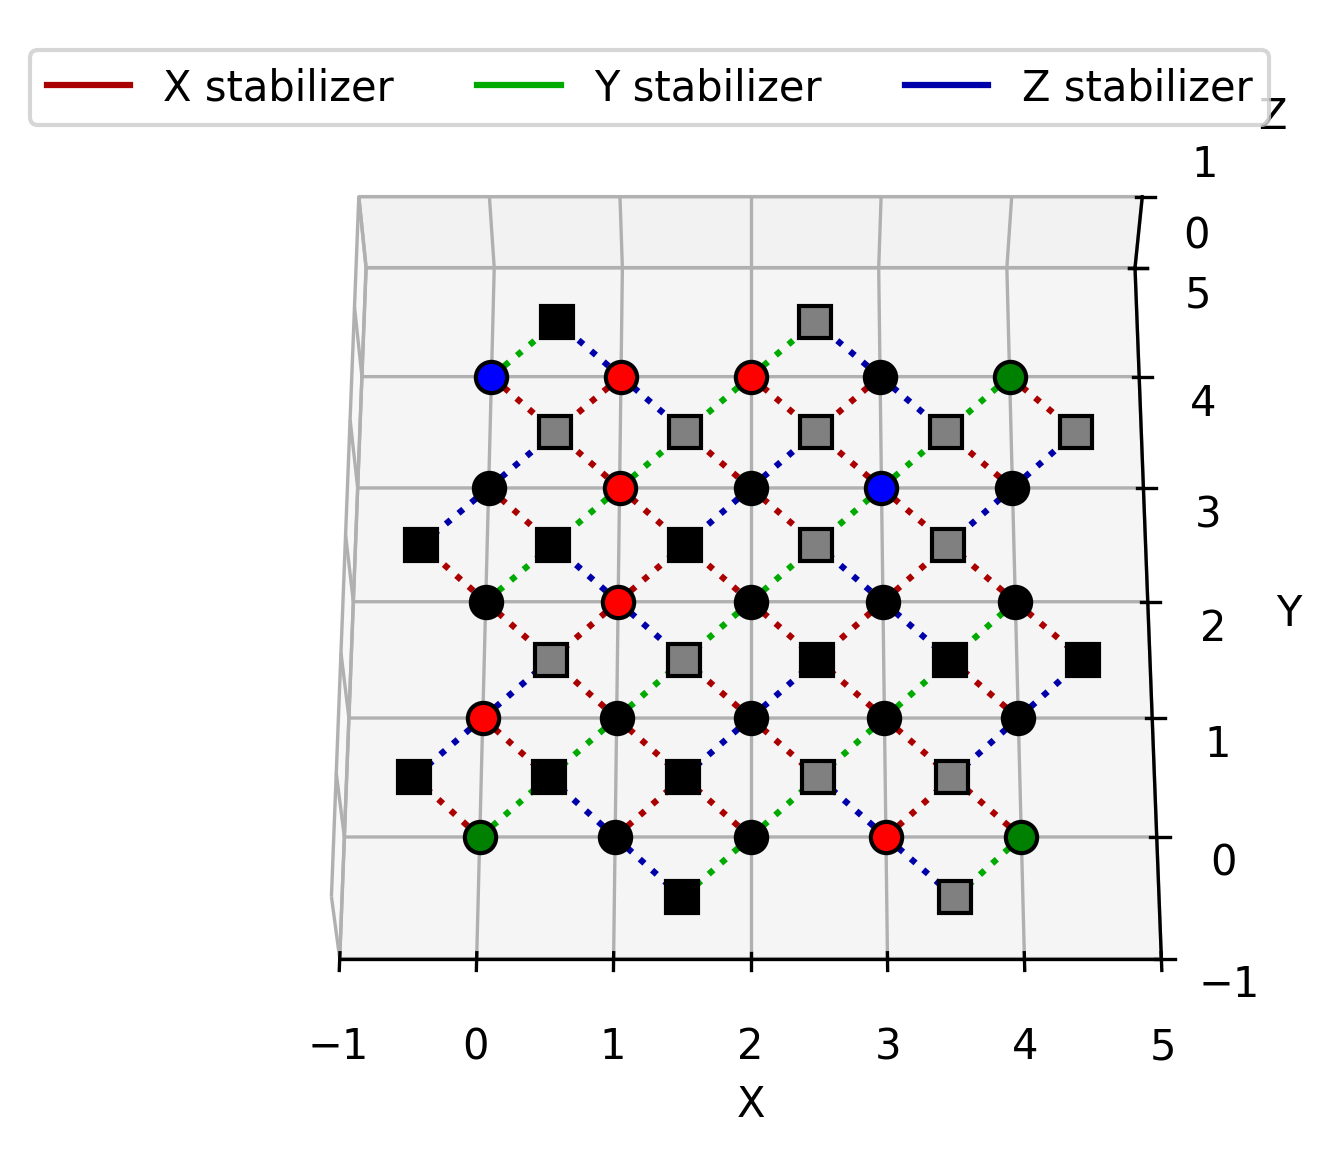

In [12]:
code_distance = 5

subkey, key = jax.random.split(key)
errors = jax_create_error_batch(
    px = .1,
    py = .1,
    pz = .1,
    size = code_distance**2,
    batch_size = 1,
    key = subkey
)

qec = QEC(surface_code_data(d=5))
# Loops through the (i,j) coordinates of the data qubits
for i in range(code_distance):
    for j in range(code_distance):
        if (i+j)%2 == 0:
            qec.deform([i,j], deformations['YZ'])
        elif j%2 == 1:
            qec.deform([i,j], deformations['XZ'])
        else:
            qec.deform([i,j], deformations['I'])
qec.show(errors=errors[0])